In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

In [2]:
%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')


In [3]:
df_main = pd.read_csv('car data.csv')

In [5]:
#df_main['Age'] = 2020 - df_main['year']
#df_main.drop('year',axis=1,inplace = True)
df_main['Age'] = 2020 - df_main['Year']
df_main.drop('Year',axis=1,inplace = True)


In [6]:
df_main.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [24]:
#df_main.drop(labels='Unnamed: 0',axis= 1, inplace = True)
df_main.shape

(301, 9)

In [8]:
#df_main.drop(labels='name',axis= 1, inplace = True)
df_main.drop(labels='Car_Name',axis= 1, inplace = True)


In [9]:
df_main = pd.get_dummies(data = df_main,drop_first=True) 
# drop_first is set to True, to avoid "Dummy Trap"


In [10]:
df_main.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


# train - test split

In [12]:
# [ km_driven, Age, fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol, transmission_Manual, seller_type_Individual]
#y = df_main['selling_price']
y = df_main['Selling_Price']
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
5       9.25
6       6.75
7       6.50
8       8.75
9       7.45
10      2.85
11      6.85
12      7.50
13      6.10
14      2.25
15      7.75
16      7.25
17      7.75
18      3.25
19      2.65
20      2.85
21      4.90
22      4.40
23      2.50
24      2.90
25      3.00
26      4.15
27      6.00
28      1.95
29      7.45
30      3.10
31      2.35
32      4.95
33      6.00
34      5.50
35      2.95
36      4.65
37      0.35
38      3.00
39      2.25
40      5.85
41      2.55
42      1.95
43      5.50
44      1.25
45      7.50
46      2.65
47      1.05
48      5.80
49      7.75
50     14.90
51     23.00
52     18.00
53     16.00
54      2.75
55      3.60
56      4.50
57      4.75
58      4.10
59     19.99
60      6.95
61      4.50
62     18.75
63     23.50
64     33.00
65      4.75
66     19.75
67      9.25
68      4.35
69     14.25
70      3.95
71      4.50
72      7.45
73      2.65
74      4.90
75      3.95
76      5.50

In [13]:
#X = pd.DataFrame(df_main, columns= ['km_driven', 'Age', 'fuel_Diesel','fuel_Electric','fuel_LPG','fuel_Petrol', 'transmission_Manual', 'seller_type_Individual'])
#X = df_main.drop('selling_price',axis=1)
X = df_main.drop('Selling_Price',axis=1)
X

,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.590,27000,0,6,0,1,0,1
1,9.540,43000,0,7,1,0,0,1
2,9.850,6900,0,3,0,1,0,1
3,4.150,5200,0,9,0,1,0,1
4,6.870,42450,0,6,1,0,0,1
5,9.830,2071,0,2,1,0,0,1
6,8.120,18796,0,5,0,1,0,1
7,8.610,33429,0,5,1,0,0,1
8,8.890,20273,0,4,1,0,0,1
9,8.920,42367,0,5,1,0,0,1


In [14]:
from sklearn.model_selection import train_test_split


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 8)
x test:  (61, 8)
y train:  (240,)
y test:  (61,)


In [16]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import pickle


In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression()

In [19]:
lr.fit(X_train,y_train)

LinearRegression()

In [20]:
# R2 score of train set
y_pred_train = lr.predict(X_train)


Train R2-score : 0.88
Test R2-score : 0.86
Train CV scores : [0.89912189 0.89838688 0.82980069 0.81769076 0.76113925]
Train CV mean : 0.84


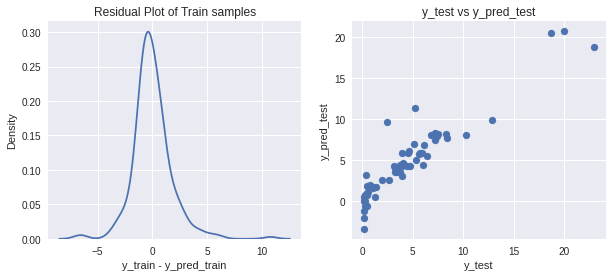

In [21]:
CV = []
R2_train = []
R2_test = []

R2_train_model = r2_score(y_train,y_pred_train)
R2_train.append(round(R2_train_model,2))
    
# R2 score of test set
y_pred_test = lr.predict(X_test)
R2_test_model = r2_score(y_test,y_pred_test)
R2_test.append(round(R2_test_model,2))
    
# R2 mean of train set using Cross validation
cross_val = cross_val_score(lr ,X_train ,y_train ,cv=5)
cv_mean = cross_val.mean()
CV.append(round(cv_mean,2))
    
# Printing results
print("Train R2-score :",round(R2_train_model,2))
print("Test R2-score :",round(R2_test_model,2))
print("Train CV scores :",cross_val)
print("Train CV mean :",round(cv_mean,2))
    
# Plotting Graphs 
# Residual Plot of train data
fig, ax = plt.subplots(1,2,figsize = (10,4))
ax[0].set_title('Residual Plot of Train samples')
sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
ax[0].set_xlabel('y_train - y_pred_train')
    
# Y_test vs Y_train scatter plot
ax[1].set_title('y_test vs y_pred_test')
ax[1].scatter(x = y_test, y = y_pred_test)
ax[1].set_xlabel('y_test')
ax[1].set_ylabel('y_pred_test')
    
plt.show()

In [23]:
car_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
car_df

,Actual,Predicted
285,7.40,7.862732
248,4.00,2.968287
150,0.50,-0.590305
217,3.15,4.213360
107,1.25,0.483176
206,5.75,5.820538
132,0.75,1.956798
73,2.65,2.558097
288,8.40,7.708708
157,0.48,0.978692
